In [1]:
from pathlib import Path
import pandas as pd

def concat_dir_csvs(root: str) -> pd.DataFrame:
    files = sorted(p for p in Path(root).rglob("*") if p.is_file() and p.suffix.lower()==".csv")
    if not files:
        return pd.DataFrame()
    dfs = []
    for f in files:
        try:
            dfs.append(pd.read_csv(f, low_memory=False, on_bad_lines="skip", encoding_errors="ignore"))
            # dfs[-1]["__source_file"] = str(f)  # optional
        except Exception as e:
            print(f"Skipped {f}: {e}")
    return pd.concat(dfs, ignore_index=True, sort=False) if dfs else pd.DataFrame()

# 4 separate DataFrames
df_zhen    = concat_dir_csvs("data/zhen")
df_alex    = concat_dir_csvs("data/alex")
df_laibah  = concat_dir_csvs("data/laibah")
df_kaitlyn = concat_dir_csvs("data/kaitlyn")

# quick sanity check (optional)
for name, df in [("zhen", df_zhen), ("alex", df_alex), ("laibah", df_laibah), ("kaitlyn", df_kaitlyn)]:
    print(name, df.shape)


Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-205353-924.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-205904-742.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-205951-268.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-210124-702.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-211045-866.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-211145-264.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-211250-490.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-212505-066.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-212638-749.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-62HHOQ9_quiz_20251001-214329-093.csv: No columns to parse from file
Skipped data/kaitlyn/DESKTOP-6

In [2]:
import pandas as pd

def sort_by_time(df: pd.DataFrame, ts_col="timestamp", inplace=False, na_position="last"):
    """
    Return (or modify) DataFrame sorted by time ascending.
    - Auto-coerces to datetime (errors->NaT).
    - na_position: 'last' or 'first'
    """
    if df is None or df.empty or ts_col not in df:
        return df
    # ensure datetime dtype
    if not pd.api.types.is_datetime64_any_dtype(df[ts_col]):
        df[ts_col] = pd.to_datetime(df[ts_col], errors="coerce")
    if inplace:
        df.sort_values(ts_col, ascending=True, na_position=na_position, inplace=True, kind="mergesort")
        df.reset_index(drop=True, inplace=True)
        return df
    out = df.sort_values(ts_col, ascending=True, na_position=na_position, kind="mergesort").reset_index(drop=True)
    return out

# sort each (overwrite variables)
df_zhen    = sort_by_time(df_zhen,    ts_col="timestamp")
df_alex    = sort_by_time(df_alex,    ts_col="timestamp")
df_laibah  = sort_by_time(df_laibah,  ts_col="timestamp")
df_kaitlyn = sort_by_time(df_kaitlyn, ts_col="timestamp")


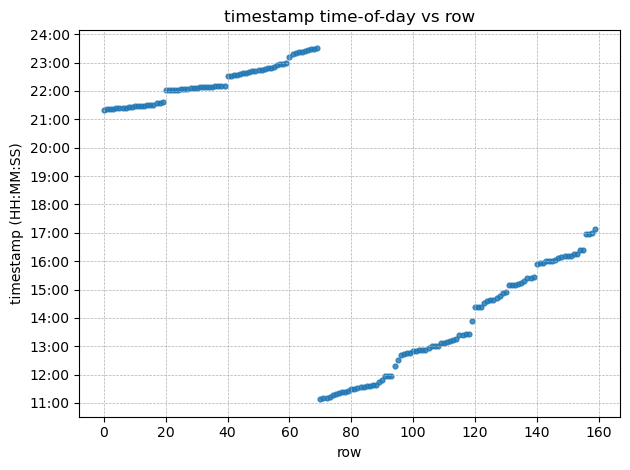

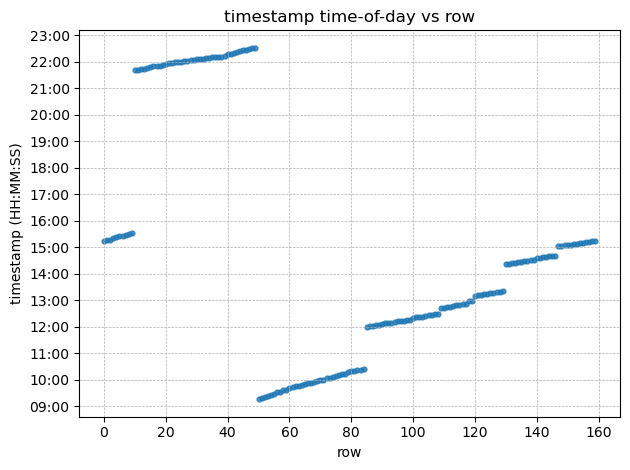

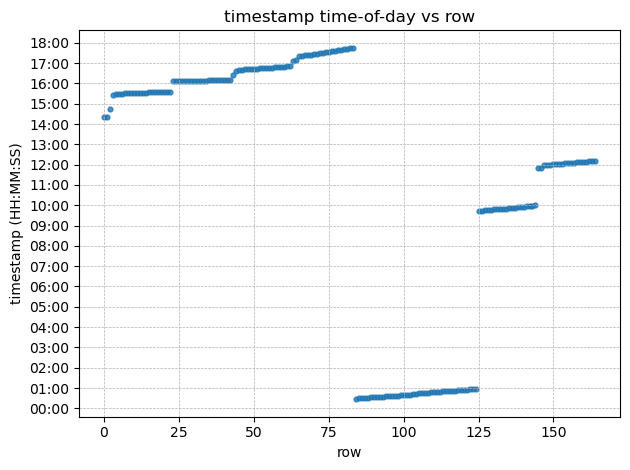

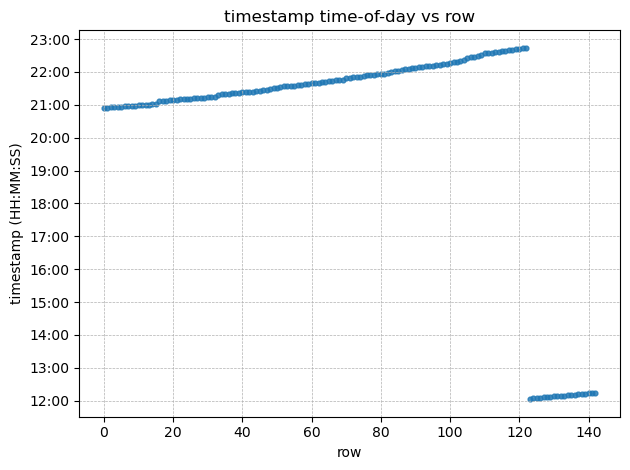

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, FuncFormatter
import pandas as pd

def scatter_time_of_day_y(df: pd.DataFrame, ts_col="timestamp", x_col=None, title=None, s=12, alpha=0.8):
    """Scatter with *time-of-day* on Y (date removed). X is row index unless x_col is given."""
    if df is None or df.empty or ts_col not in df:
        print("Nothing to plot."); return
    ts = pd.to_datetime(df[ts_col], errors="coerce")
    valid = ts.notna()
    if not valid.any():
        print("No valid timestamps."); return

    # minutes since midnight (date-agnostic)
    minutes = (ts.dt.hour * 60 + ts.dt.minute + ts.dt.second / 60.0)[valid]
    x = (df.index[valid].to_numpy() if x_col is None else df.loc[valid, x_col].to_numpy())

    plt.figure()
    plt.scatter(x, minutes, s=s, alpha=alpha)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(60))  # every hour
    ax.yaxis.set_major_formatter(FuncFormatter(lambda m, _: f"{int(m//60):02d}:{int(m%60):02d}"))
    plt.xlabel("row" if x_col is None else x_col)
    plt.ylabel(f"{ts_col} (HH:MM:SS)")
    plt.title(title or f"{ts_col} time-of-day vs {'row' if x_col is None else x_col}")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout(); plt.show()


# Use it for each dataframe (adjust ts_col if your column name differs)
scatter_time_of_day_y(df_zhen,   ts_col="timestamp")
scatter_time_of_day_y(df_alex,   ts_col="timestamp")
scatter_time_of_day_y(df_laibah, ts_col="timestamp")
scatter_time_of_day_y(df_kaitlyn,ts_col="timestamp")


In [4]:
import pandas as pd

def add_owner_label(df, owner, col="owner"):
    """Return df with a constant label column."""
    if df is None or df.empty:
        return pd.DataFrame({col: pd.Series(dtype="object")})
    out = df.copy()
    out[col] = owner
    return out

df_zhen    = add_owner_label(df_zhen,    "zhen")
df_alex    = add_owner_label(df_alex,    "alex")
df_laibah  = add_owner_label(df_laibah,  "laibah")
df_kaitlyn = add_owner_label(df_kaitlyn, "kaitlyn")

df_zhen.head()


,timestamp,display_type,quiz_type,math_question,delay_seconds,num_words,generated_words,user_input,score_percentage,hostname,failed_math_attempts,lettersOnly,owner
0,2025-10-01 21:20:07,sequential,unordered,False,2.0,10,rice paper park coat floor shoe key sock box bus,rice paper park shoe floor box,60.0,nixos,NaN,NaN,zhen
1,2025-10-01 21:21:05,sequential,unordered,False,2.0,10,milk star room phone hand water house toy mone...,watch money star phone milk,50.0,nixos,NaN,NaN,zhen
2,2025-10-01 21:21:37,sequential,unordered,False,2.0,10,sea phone light cake sock road mom man moon bike,mom star man watch,20.0,nixos,NaN,NaN,zhen
3,2025-10-01 21:22:21,sequential,unordered,False,2.0,10,bag bed group table cat coat snow toy shirt bank,shirt cat man box,20.0,nixos,NaN,NaN,zhen
4,2025-10-01 21:23:04,sequential,unordered,False,2.0,10,bank team game light rain eye water river boss...,eye water bank rain light,50.0,nixos,NaN,NaN,zhen


In [5]:
import numpy as np
import pandas as pd

def add_block_counter(df: pd.DataFrame, block=20, col="test", start=1):
    """Adds col where values increment by 1 every `block` rows: 1..2..3..."""
    if df is None or df.empty:
        return pd.DataFrame({col: pd.Series(dtype="Int64")})
    out = df.copy()
    out[col] = (np.arange(len(out)) // block) + start
    return out

# Apply to each dataframe
df_zhen    = add_block_counter(df_zhen,    block=20, col="test", start=1)
df_alex    = add_block_counter(df_alex,    block=20, col="test", start=1)
df_laibah  = add_block_counter(df_laibah,  block=20, col="test", start=1)
df_kaitlyn = add_block_counter(df_kaitlyn, block=20, col="test", start=1)


df_laibah.head()

,timestamp,display_type,quiz_type,delay_seconds,num_words,generated_words,user_input,score_percentage,hostname,math_question,failed_math_attempts,lettersOnly,owner,test
0,2025-09-16 14:20:18,full,unordered,5.0,3,coin dog work,coin dog work,100.0,Laibah,NaN,NaN,NaN,laibah,1
1,2025-09-16 14:21:45,sequential,ordered,1.0,3,shop boat belt,shop boat belt,100.0,Laibah,NaN,NaN,NaN,laibah,1
2,2025-09-16 14:45:25,full,ordered,2.0,2,man egg,man egg,100.0,Laibah,NaN,NaN,NaN,laibah,1
3,2025-10-01 15:27:12,full,unordered,2.0,10,bank fire beach store bag party lamp cup clock...,bank fire beach,30.0,Laibah,False,NaN,NaN,laibah,1
4,2025-10-01 15:29:38,full,unordered,2.0,10,rice park pants child truck ring watch watch e...,ride park,10.0,Laibah,False,NaN,NaN,laibah,1


In [6]:
import pandas as pd

# Merge all four into one DataFrame
df_all = pd.concat(
    [df_zhen, df_alex, df_laibah, df_kaitlyn],
    ignore_index=True,
    sort=False
)

# (optional) quick peek
print(df_all.shape)
df_all.head()


(628, 14)


,timestamp,display_type,quiz_type,math_question,delay_seconds,num_words,generated_words,user_input,score_percentage,hostname,failed_math_attempts,lettersOnly,owner,test
0,2025-10-01 21:20:07,sequential,unordered,False,2.0,10,rice paper park coat floor shoe key sock box bus,rice paper park shoe floor box,60.0,nixos,NaN,NaN,zhen,1
1,2025-10-01 21:21:05,sequential,unordered,False,2.0,10,milk star room phone hand water house toy mone...,watch money star phone milk,50.0,nixos,NaN,NaN,zhen,1
2,2025-10-01 21:21:37,sequential,unordered,False,2.0,10,sea phone light cake sock road mom man moon bike,mom star man watch,20.0,nixos,NaN,NaN,zhen,1
3,2025-10-01 21:22:21,sequential,unordered,False,2.0,10,bag bed group table cat coat snow toy shirt bank,shirt cat man box,20.0,nixos,NaN,NaN,zhen,1
4,2025-10-01 21:23:04,sequential,unordered,False,2.0,10,bank team game light rain eye water river boss...,eye water bank rain light,50.0,nixos,NaN,NaN,zhen,1


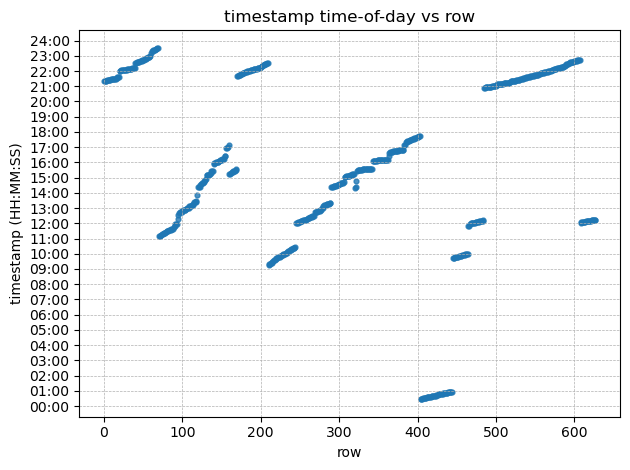

In [7]:
scatter_time_of_day_y(df_all)

In [8]:
df_all.to_csv("./combined.csv")